In [1]:
import geopandas as gpd # for mapping
from shapely.geometry import Point, Polygon # for mapping
import pandas as pd # for panda package
import matplotlib.pyplot as plt # for plots
import datetime as dt # TimeSeries
import os

In [2]:
url = "https://data.cityofnewyork.us/api/views/qiz3-axqb/rows.csv?accessType=DOWNLOAD&bom=true&query=select+*"

In [3]:
NYPD = pd.read_csv(url) #load the data

C:\Users\Eugene\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
NYPD

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Zip Codes,Borough Boundaries,City Council Districts,Community Districts,Police Precincts
0,05/11/2019,5:30,NaN,NaN,40.662140,-73.982240,"(40.66214, -73.98224)",8 AVENUE,NaN,NaN,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,17617.0,2.0,27.0,9.0,45.0
1,05/11/2019,12:00,BROOKLYN,11207,40.658577,-73.890630,"(40.658577, -73.89063)",PENNSYLVANIA AVENUE,LINDEN BOULEVARD,NaN,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,17214.0,2.0,25.0,45.0,47.0
2,05/11/2019,22:20,QUEENS,11413,40.668800,-73.742805,"(40.6688, -73.742805)",231 STREET,139 AVENUE,NaN,...,Sedan,Sedan,NaN,NaN,NaN,15313.0,3.0,47.0,63.0,63.0
3,05/11/2019,20:10,BROOKLYN,11207,40.670593,-73.886970,"(40.670593, -73.88697)",BARBEY STREET,SUTTER AVENUE,NaN,...,Sedan,Sedan,NaN,NaN,NaN,17214.0,2.0,25.0,45.0,47.0
4,05/11/2019,10:45,NaN,NaN,40.818016,-73.960430,"(40.818016, -73.96043)",WEST 125 STREET,NaN,NaN,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,12424.0,4.0,23.0,37.0,17.0
5,05/11/2019,15:30,MANHATTAN,10065,40.768646,-73.969830,"(40.768646, -73.96983)",EAST 66 STREET,5 AVENUE,NaN,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,4.0,19.0,19.0,13.0
6,05/11/2019,13:24,NaN,NaN,NaN,NaN,NaN,HENRY HUDSON PARKWAY,NaN,NaN,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,05/11/2019,22:00,NaN,NaN,40.888596,-73.890680,"(40.888596, -73.89068)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,11605.0,5.0,40.0,27.0,33.0
8,05/11/2019,14:05,MANHATTAN,10075,40.774967,-73.956800,"(40.774967, -73.9568)",EAST 80 STREET,3 AVENUE,NaN,...,Moped,Pick-up Truck,NaN,NaN,NaN,10092.0,4.0,1.0,23.0,11.0
9,05/11/2019,10:18,MANHATTAN,10036,40.758890,-73.985790,"(40.75889, -73.98579)",NaN,NaN,205 WEST 46 STREET,...,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,13094.0,4.0,10.0,11.0,10.0


In [5]:
NYPD["Total_Death"] = NYPD["NUMBER OF PERSONS KILLED"] + NYPD["NUMBER OF PEDESTRIANS KILLED"] + NYPD["NUMBER OF CYCLIST KILLED"]+NYPD["NUMBER OF MOTORIST KILLED"] 
# Making a column in the Dataframe(NYPD) call Total_Death

In [6]:
NYPD["Total_Injured"] = NYPD["NUMBER OF PERSONS INJURED"] + NYPD["NUMBER OF PEDESTRIANS INJURED"] + NYPD["NUMBER OF CYCLIST INJURED"]+NYPD["NUMBER OF MOTORIST INJURED"]
# Making a column in the Dataframe(NYPD) call Total_Injured

In [7]:
NYPD

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Zip Codes,Borough Boundaries,City Council Districts,Community Districts,Police Precincts,Total_Death,Total_Injured
0,05/11/2019,5:30,NaN,NaN,40.662140,-73.982240,"(40.66214, -73.98224)",8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,17617.0,2.0,27.0,9.0,45.0,0.0,0.0
1,05/11/2019,12:00,BROOKLYN,11207,40.658577,-73.890630,"(40.658577, -73.89063)",PENNSYLVANIA AVENUE,LINDEN BOULEVARD,NaN,...,NaN,NaN,NaN,17214.0,2.0,25.0,45.0,47.0,0.0,0.0
2,05/11/2019,22:20,QUEENS,11413,40.668800,-73.742805,"(40.6688, -73.742805)",231 STREET,139 AVENUE,NaN,...,NaN,NaN,NaN,15313.0,3.0,47.0,63.0,63.0,0.0,0.0
3,05/11/2019,20:10,BROOKLYN,11207,40.670593,-73.886970,"(40.670593, -73.88697)",BARBEY STREET,SUTTER AVENUE,NaN,...,NaN,NaN,NaN,17214.0,2.0,25.0,45.0,47.0,0.0,0.0
4,05/11/2019,10:45,NaN,NaN,40.818016,-73.960430,"(40.818016, -73.96043)",WEST 125 STREET,NaN,NaN,...,NaN,NaN,NaN,12424.0,4.0,23.0,37.0,17.0,0.0,0.0
5,05/11/2019,15:30,MANHATTAN,10065,40.768646,-73.969830,"(40.768646, -73.96983)",EAST 66 STREET,5 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4.0,19.0,19.0,13.0,0.0,2.0
6,05/11/2019,13:24,NaN,NaN,NaN,NaN,NaN,HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,05/11/2019,22:00,NaN,NaN,40.888596,-73.890680,"(40.888596, -73.89068)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,11605.0,5.0,40.0,27.0,33.0,0.0,10.0
8,05/11/2019,14:05,MANHATTAN,10075,40.774967,-73.956800,"(40.774967, -73.9568)",EAST 80 STREET,3 AVENUE,NaN,...,NaN,NaN,NaN,10092.0,4.0,1.0,23.0,11.0,0.0,0.0
9,05/11/2019,10:18,MANHATTAN,10036,40.758890,-73.985790,"(40.75889, -73.98579)",NaN,NaN,205 WEST 46 STREET,...,NaN,NaN,NaN,13094.0,4.0,10.0,11.0,10.0,0.0,0.0


In [8]:
Injured_Death = NYPD[["DATE","Total_Death","Total_Injured"]] # New Dataframe with only the number of Killed and Injured

In [9]:
Injured_Death['DATE'] = pd.to_datetime(Injured_Death.DATE) # Change the order of dates so Pandas can read them

C:\Users\Eugene\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
Injured_Death 

,DATE,Total_Death,Total_Injured
0,2019-05-11,0.0,0.0
1,2019-05-11,0.0,0.0
2,2019-05-11,0.0,0.0
3,2019-05-11,0.0,0.0
4,2019-05-11,0.0,0.0
5,2019-05-11,0.0,2.0
6,2019-05-11,0.0,0.0
7,2019-05-11,0.0,10.0
8,2019-05-11,0.0,0.0
9,2019-05-11,0.0,0.0


In [11]:
Years = Injured_Death.groupby([Injured_Death['DATE'].dt.year.rename('year')]).agg({'sum'}) 
# Group Killed and Injured people by year and sum them

In [12]:
Years

,Total_Death,Total_Injured
,sum,sum
year,,
2012,274.0,54898.0
2013,594.0,110248.0
2014,524.0,102427.0
2015,486.0,102716.0
2016,489.0,120882.0
2017,515.0,121312.0
2018,454.0,123817.0
2019,148.0,39778.0


In [13]:
Years = Years.reset_index() # reset index to make it easy to plot

In [14]:
Years

,year,Total_Death,Total_Injured
,,sum,sum
0,2012,274.0,54898.0
1,2013,594.0,110248.0
2,2014,524.0,102427.0
3,2015,486.0,102716.0
4,2016,489.0,120882.0
5,2017,515.0,121312.0
6,2018,454.0,123817.0
7,2019,148.0,39778.0


In [15]:
def PeopleHurt(df,condition): # a function that take the Dataframe(Years) and the condition which is either Total_Death or Total_Injured
    fig, ax = plt.subplots(figsize = (10,6)) 
    plt.scatter(df.year,df[condition], color='r', label = condition) # Scatter plot
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylabel("Number of People") # Labeling
    ax.set_xlabel("Years")
    ax.axvline(2014,c="purple", alpha= 0.4,linestyle = '--', label = "Vision Zero") # a vertical line showing Vision Zero 
    ax.legend() # Show Legend

    if condition == "Total_Injured": # for Total_Injured
        ax.set_ylim(30000,150000) # y axis 
        ax.set_title( "Total Injured in Motor Collision from July 2012 - May 2019 (5 Borough)", fontsize = 15, fontweight = "bold", fontname="Arial")
        ax.annotate( 
        'Beginning of Vision Zero', 
        xy=(2014, 60000), 
        xycoords="data",
        xytext=(2015, 60000), 
        horizontalalignment="left", 
        arrowprops={
            "arrowstyle": "-|>",
            "connectionstyle": "angle3,angleA=5,angleB=110",
            "color": "blue"
        },
        fontsize=12,
        )

    else: # for Total_Death
        ax.set_ylim(100,650)
        ax.set_title( "Total Killed in Motor Collision from July 2012 - May 2019 (5 Borough)", fontsize = 15, fontweight = "bold",fontname="Arial")
        ax.annotate(
        'Beginning of Vision Zero', 
        xy=(2014, 200), 
        xycoords="data",
        xytext=(2015, 175), 
        horizontalalignment="left", 
        arrowprops={
            "arrowstyle": "-|>",
            "connectionstyle": "angle3,angleA=5,angleB=110",
            "color": "blue"
        },
        fontsize=12,
        )

    plt.show()

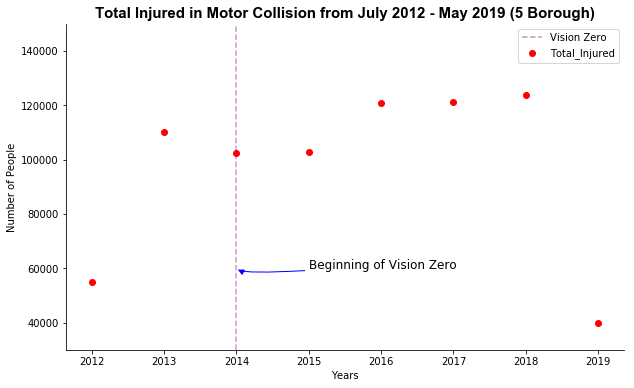

In [16]:
PeopleHurt(Years,"Total_Injured")

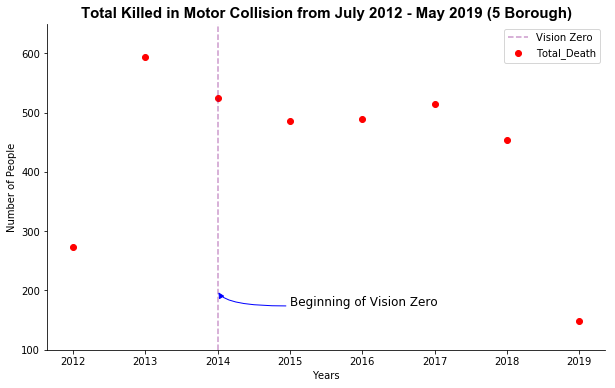

In [17]:
PeopleHurt(Years,"Total_Death")

**In the scatter plot above, we can clearly see that Vision Zero has helped decrease the number of deaths in NYC. In 2018, the number of deaths in NYC is only 454 people which is low compare to that of other years. Vision Zero is mainly focused on preventing deaths in NYC, thus it did not prevent injuries across five Borough. There are myriad factors that contributed to the increase of injuries in NYC such as self-driving cars, crowded streets, distraction of phones etc. In conclusion, it can be safe to say that Mayor Bill de Blasio did the right thing by creating Vision Zero in 2014.**

In [18]:
grp= NYPD.groupby("BOROUGH") # Group by Borough

In [19]:
grp.groups

{'BRONX': Int64Index([     12,      16,      18,      20,      25,      32,      37,
                  53,      64,      70,
             ...
             1493818, 1493838, 1493858, 1493944, 1493976, 1493986, 1493988,
             1493996, 1494002, 1494010],
            dtype='int64', length=144140),
 'BROOKLYN': Int64Index([      1,       3,      26,      27,      28,      29,      35,
                  36,      46,      48,
             ...
             1494075, 1494076, 1494079, 1494080, 1494081, 1494084, 1494086,
             1494087, 1494088, 1494091],
            dtype='int64', length=323982),
 'MANHATTAN': Int64Index([      5,       8,       9,      14,      39,      42,      47,
                  51,      92,     102,
             ...
             1493922, 1493926, 1493983, 1493987, 1493989, 1494016, 1494037,
             1494047, 1494051, 1494059],
            dtype='int64', length=254681),
 'QUEENS': Int64Index([      2,      15,      17,      19,      30,      34,      41,
 

In [20]:
grp_week = grp.agg(["sum"]) 

In [21]:
grp_week= grp_week[["Total_Death","Total_Injured"]]

In [22]:
grp_week

,Total_Death,Total_Injured
,sum,sum
BOROUGH,,
BRONX,306.0,81812.0
BROOKLYN,731.0,187635.0
MANHATTAN,422.0,87935.0
QUEENS,680.0,144246.0
STATEN ISLAND,128.0,22663.0


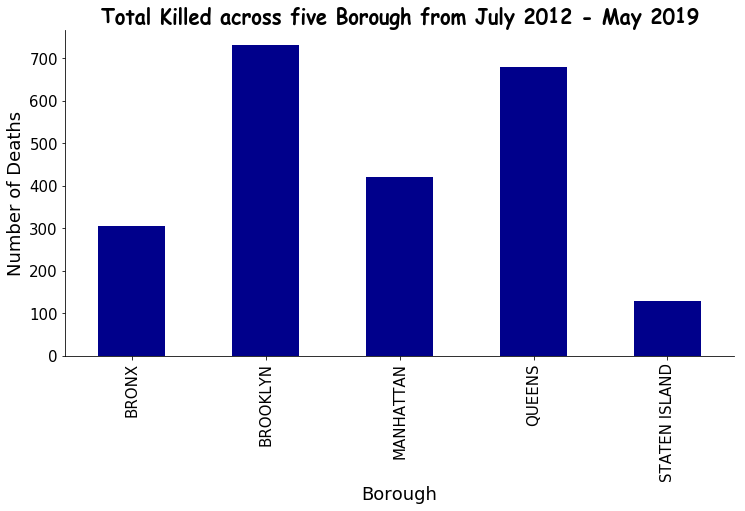

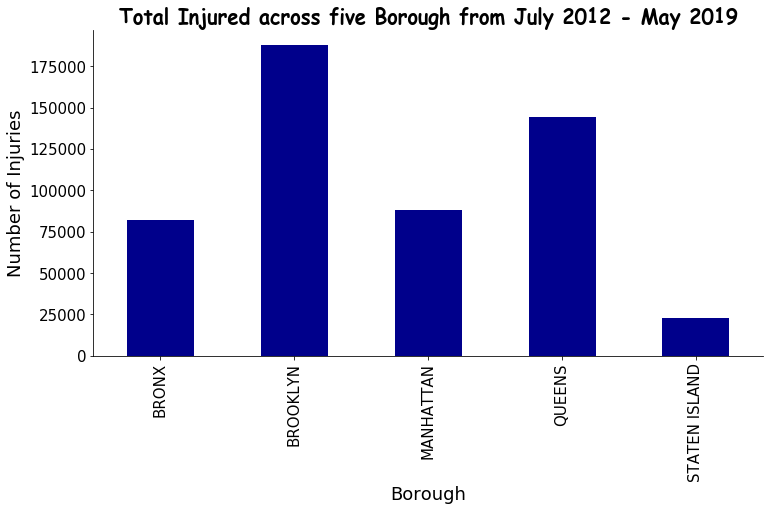

In [23]:
Anaylze = ["Total_Death", "Total_Injured"] 
for items in Anaylze: # plot the total killed and injured across 5 Borough using a bar diagram 
    ax = grp_week[[items]].plot(kind='bar', figsize=(12, 6), fontsize=15, label = "Death", color = "darkblue") # bar plot
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.get_legend().remove()
    if items == "Total_Death": # setting conditions
        ax.set_title ("Total Killed across five Borough from July 2012 - May 2019",fontsize = 20, fontweight = "bold", fontname="Comic Sans MS")
        ax.set_ylabel("Number of Deaths", fontsize = 18) #labeling
        ax.set_xlabel("Borough", fontsize = 18)
        plt.show()
    else:
        ax.set_title ("Total Injured across five Borough from July 2012 - May 2019",fontsize = 20, fontweight = "bold",fontname="Comic Sans MS")
        ax.set_ylabel("Number of Injuries", fontsize = 18)
        ax.set_xlabel("Borough", fontsize = 18)
        plt.show()

**In the bar diagram above, it illustrates the fact that Brooklyn is the most dangerous borough in NYC with the most deaths and the most injuries. The results should be obvious since Brooklyn is the most populated borough followered by Queens. The safest borough is Staten Island with the least killed and injured. One main reason that Staten Island is the safest borough is that it has the least amount of people living there.**

In [24]:
Factors=["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5"]
Events= [] # Empty list 
for items in Factors:
    Counts = NYPD[items].value_counts() # counting from most to least
    Cause= Events.append(Counts) # Append to empty list

In [25]:
Events

[Unspecified                                              564403
 Driver Inattention/Distraction                           269139
 Failure to Yield Right-of-Way                             83841
 Following Too Closely                                     69621
 Backing Unsafely                                          56331
 Other Vehicular                                           47742
 Fatigued/Drowsy                                           46753
 Turning Improperly                                        38647
 Passing or Lane Usage Improper                            32917
 Passing Too Closely                                       29989
 Unsafe Lane Changing                                      27125
 Traffic Control Disregarded                               22705
 Driver Inexperience                                       21768
 Lost Consciousness                                        19503
 Pavement Slippery                                         15391
 Prescription Medication 

In [26]:
Events = pd.DataFrame(Events) # Convert List to Dataframe

In [27]:
Events

,Unspecified,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Backing Unsafely,Other Vehicular,Fatigued/Drowsy,Turning Improperly,Passing or Lane Usage Improper,Passing Too Closely,...,Headlights Defective,Cell Phone (hand-held),Eating or Drinking,Tinted Windows,Vehicle Vandalism,Shoulders Defective/Improper,Windshield Inadequate,Texting,Listening/Using Headphones,1
CONTRIBUTING FACTOR VEHICLE 1,564403.0,269139.0,83841.0,69621.0,56331.0,47742.0,46753.0,38647.0,32917.0,29989.0,...,86.0,79.0,72.0,72.0,70.0,68.0,66.0,33.0,14.0,10.0
CONTRIBUTING FACTOR VEHICLE 2,1089742.0,66442.0,13031.0,11894.0,6588.0,25246.0,10820.0,7430.0,8276.0,5784.0,...,42.0,22.0,6.0,17.0,4.0,11.0,7.0,3.0,3.0,5.0
CONTRIBUTING FACTOR VEHICLE 3,89399.0,1264.0,117.0,1101.0,85.0,1783.0,853.0,67.0,64.0,25.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
CONTRIBUTING FACTOR VEHICLE 4,18835.0,154.0,15.0,202.0,8.0,325.0,170.0,4.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
CONTRIBUTING FACTOR VEHICLE 5,4802.0,37.0,4.0,43.0,1.0,81.0,41.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
Events['Driver Inattention/Distraction'].sum() # Add the total number of Driver Inattention/Distraction together from the Dataframe

337036.0

In [29]:
Events["Failure to Yield Right-of-Way"].sum() # Add the total number of Failure to Yield Right-of-Way together from the Dataframe

97008.0

In [30]:
Events["Following Too Closely"].sum() # Add the total number of Following Too Closely together from the Dataframe

82861.0

In [31]:
Events["Backing Unsafely"].sum() # Add the total number of Backing Unsafely together from the Dataframe

63013.0

In [32]:
Events["Other Vehicular"].sum() # Add the total number of Backing Unsafely together from the Dataframe

75177.0

#### The top 5 cause of accidents in NYC from 2012 to 2019 are:
1. Driver Inattention/Distraction (337036 incidents)
2. Failure to Yield Right-of-Way (97008 incidents)
3. Following Too Closely (82861 incidents)
4. Other Vehicular (75177 incidents)
5. Backing Unsafely (63013 incidents)

In [33]:
cwd = os.getcwd()

In [34]:
shape_file = cwd + "\\Shapefile\\ZIP_CODE_040114.shx" 

In [35]:
nyc_map = gpd.read_file(shape_file) #Load shape file 

In [36]:
NYPD = NYPD.dropna(axis=0, subset=['ZIP CODE']) # drop all rows with Zipcodes that contain "NaN" in Dataframe 

In [37]:
NYPD

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Zip Codes,Borough Boundaries,City Council Districts,Community Districts,Police Precincts,Total_Death,Total_Injured
1,05/11/2019,12:00,BROOKLYN,11207,40.658577,-73.890630,"(40.658577, -73.89063)",PENNSYLVANIA AVENUE,LINDEN BOULEVARD,NaN,...,NaN,NaN,NaN,17214.0,2.0,25.0,45.0,47.0,0.0,0.0
2,05/11/2019,22:20,QUEENS,11413,40.668800,-73.742805,"(40.6688, -73.742805)",231 STREET,139 AVENUE,NaN,...,NaN,NaN,NaN,15313.0,3.0,47.0,63.0,63.0,0.0,0.0
3,05/11/2019,20:10,BROOKLYN,11207,40.670593,-73.886970,"(40.670593, -73.88697)",BARBEY STREET,SUTTER AVENUE,NaN,...,NaN,NaN,NaN,17214.0,2.0,25.0,45.0,47.0,0.0,0.0
5,05/11/2019,15:30,MANHATTAN,10065,40.768646,-73.969830,"(40.768646, -73.96983)",EAST 66 STREET,5 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4.0,19.0,19.0,13.0,0.0,2.0
8,05/11/2019,14:05,MANHATTAN,10075,40.774967,-73.956800,"(40.774967, -73.9568)",EAST 80 STREET,3 AVENUE,NaN,...,NaN,NaN,NaN,10092.0,4.0,1.0,23.0,11.0,0.0,0.0
9,05/11/2019,10:18,MANHATTAN,10036,40.758890,-73.985790,"(40.75889, -73.98579)",NaN,NaN,205 WEST 46 STREET,...,NaN,NaN,NaN,13094.0,4.0,10.0,11.0,10.0,0.0,0.0
12,05/11/2019,11:14,BRONX,10469,40.861187,-73.838040,"(40.861187, -73.83804)",NaN,NaN,2408 TIEMANN AVENUE,...,NaN,NaN,NaN,11607.0,5.0,12.0,59.0,32.0,0.0,0.0
14,05/11/2019,16:22,MANHATTAN,10013,40.725193,-74.007675,"(40.725193, -74.007675)",HUDSON STREET,DOMINICK STREET,NaN,...,NaN,NaN,NaN,12076.0,4.0,10.0,57.0,1.0,0.0,2.0
15,05/11/2019,14:20,QUEENS,11357,40.780087,-73.817154,"(40.780087, -73.817154)",149 STREET,21 AVENUE,NaN,...,NaN,NaN,NaN,14192.0,3.0,20.0,22.0,67.0,0.0,0.0
16,05/11/2019,16:55,BRONX,10454,40.809050,-73.913710,"(40.80905, -73.91371)",NaN,NaN,355 BEEKMAN AVENUE,...,NaN,NaN,NaN,10932.0,5.0,35.0,49.0,23.0,0.0,2.0


In [38]:
NYPD['ZIPCODE']= NYPD['ZIP CODE'] # rename column 

C:\Users\Eugene\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
NYPD

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Zip Codes,Borough Boundaries,City Council Districts,Community Districts,Police Precincts,Total_Death,Total_Injured,ZIPCODE
1,05/11/2019,12:00,BROOKLYN,11207,40.658577,-73.890630,"(40.658577, -73.89063)",PENNSYLVANIA AVENUE,LINDEN BOULEVARD,NaN,...,NaN,NaN,17214.0,2.0,25.0,45.0,47.0,0.0,0.0,11207
2,05/11/2019,22:20,QUEENS,11413,40.668800,-73.742805,"(40.6688, -73.742805)",231 STREET,139 AVENUE,NaN,...,NaN,NaN,15313.0,3.0,47.0,63.0,63.0,0.0,0.0,11413
3,05/11/2019,20:10,BROOKLYN,11207,40.670593,-73.886970,"(40.670593, -73.88697)",BARBEY STREET,SUTTER AVENUE,NaN,...,NaN,NaN,17214.0,2.0,25.0,45.0,47.0,0.0,0.0,11207
5,05/11/2019,15:30,MANHATTAN,10065,40.768646,-73.969830,"(40.768646, -73.96983)",EAST 66 STREET,5 AVENUE,NaN,...,NaN,NaN,NaN,4.0,19.0,19.0,13.0,0.0,2.0,10065
8,05/11/2019,14:05,MANHATTAN,10075,40.774967,-73.956800,"(40.774967, -73.9568)",EAST 80 STREET,3 AVENUE,NaN,...,NaN,NaN,10092.0,4.0,1.0,23.0,11.0,0.0,0.0,10075
9,05/11/2019,10:18,MANHATTAN,10036,40.758890,-73.985790,"(40.75889, -73.98579)",NaN,NaN,205 WEST 46 STREET,...,NaN,NaN,13094.0,4.0,10.0,11.0,10.0,0.0,0.0,10036
12,05/11/2019,11:14,BRONX,10469,40.861187,-73.838040,"(40.861187, -73.83804)",NaN,NaN,2408 TIEMANN AVENUE,...,NaN,NaN,11607.0,5.0,12.0,59.0,32.0,0.0,0.0,10469
14,05/11/2019,16:22,MANHATTAN,10013,40.725193,-74.007675,"(40.725193, -74.007675)",HUDSON STREET,DOMINICK STREET,NaN,...,NaN,NaN,12076.0,4.0,10.0,57.0,1.0,0.0,2.0,10013
15,05/11/2019,14:20,QUEENS,11357,40.780087,-73.817154,"(40.780087, -73.817154)",149 STREET,21 AVENUE,NaN,...,NaN,NaN,14192.0,3.0,20.0,22.0,67.0,0.0,0.0,11357
16,05/11/2019,16:55,BRONX,10454,40.809050,-73.913710,"(40.80905, -73.91371)",NaN,NaN,355 BEEKMAN AVENUE,...,NaN,NaN,10932.0,5.0,35.0,49.0,23.0,0.0,2.0,10454


In [40]:
nyc_map

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [41]:
NYPD.dtypes 

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [42]:
nyc_map.dtypes

ZIPCODE        object
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

In [43]:
grp= NYPD.groupby("ZIPCODE") # group by zipcode

In [44]:
grp_week = grp.agg(["sum"]) 

In [45]:
grp_week= grp_week[["Total_Death","Total_Injured"]]

In [46]:
grp_week # contain a Dataframe with total number of killed and injured and their corresponding Zipcodes

,Total_Death,Total_Injured
,sum,sum
ZIPCODE,,
10000.0,0.0,172.0
10001.0,8.0,2368.0
10002.0,22.0,3579.0
10003.0,14.0,2211.0
10004.0,2.0,329.0
10005.0,0.0,224.0
10006.0,0.0,272.0
10007.0,2.0,907.0


In [47]:
Map = nyc_map.merge(grp_week, on='ZIPCODE', how = "left") # Merge 2 Dataframe together by Zipcodes

C:\Users\Eugene\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [48]:
Map

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,"(Total_Death, sum)","(Total_Injured, sum)"
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",2.0,376.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",6.0,2266.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",12.0,2334.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",4.0,1303.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",4.0,1226.0
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,...",6.0,2406.0
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,...",2.0,1200.0
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,...",2.0,1676.0
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,...",14.0,1512.0
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",6.0,1294.0


In [49]:
Map.columns.tolist() # Show all columns in Map

['ZIPCODE',
 'BLDGZIP',
 'PO_NAME',
 'POPULATION',
 'AREA',
 'STATE',
 'COUNTY',
 'ST_FIPS',
 'CTY_FIPS',
 'URL',
 'SHAPE_AREA',
 'SHAPE_LEN',
 'geometry',
 ('Total_Death', 'sum'),
 ('Total_Injured', 'sum')]

In [50]:
Map.columns = ['ZIPCODE', 'BLDGZIP', 'PO_NAME','POPULATION','AREA','STATE','COUNTY','ST_FIPS','CTY_FIPS','URL','SHAPE_AREA','SHAPE_LEN','geometry','Total_Death',"Total_Injured"]
# rename columns to make it professional

In [51]:
Map

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Total_Death,Total_Injured
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",2.0,376.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",6.0,2266.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",12.0,2334.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",4.0,1303.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",4.0,1226.0
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,...",6.0,2406.0
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,...",2.0,1200.0
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,...",2.0,1676.0
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,...",14.0,1512.0
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,...",6.0,1294.0


C:\Users\Eugene\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 0.98, 'Total Killed in Different Area')

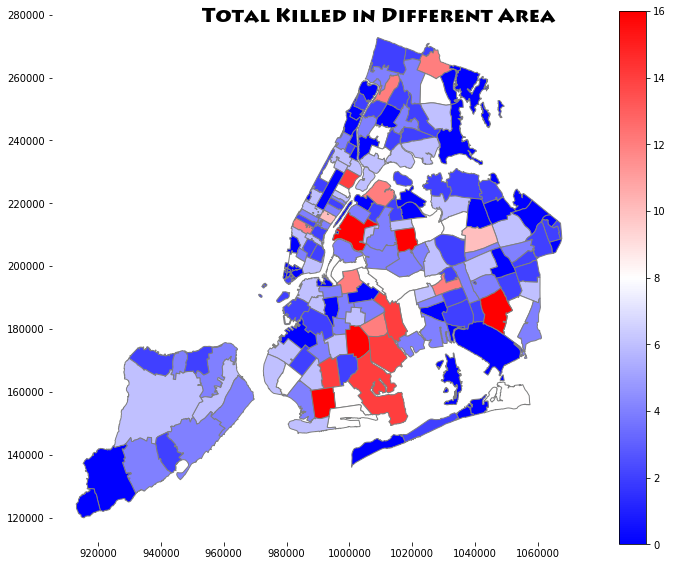

In [52]:
fig, ax = plt.subplots(figsize = (10,8)) # plot a heatmap on number of deaths in NYC 
plt.tight_layout()
Map.plot(ax = ax,
             column = "Total_Death", 
             edgecolor = 'tab:grey', 
             cmap="bwr", # color code for this map  
             vmin=0, vmax=Map.Total_Death.max(), legend=True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
fig.suptitle("Total Killed in Different Area", fontsize = 20,fontweight = "bold", fontname = "Lithos Pro")

Text(0.5, 0.98, 'Total Injured in Different Area')

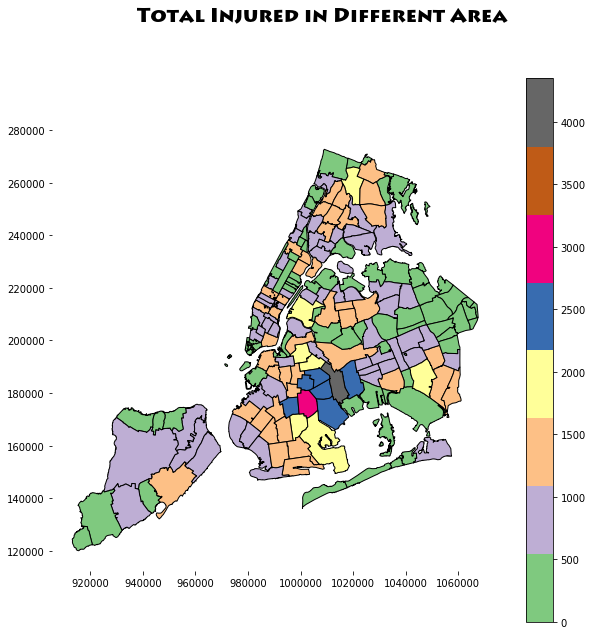

In [53]:
fig,ax = plt.subplots(figsize = (10,10)) # plot a heatmap on number of injuries in NYC 
Map.plot(ax = ax,
             column = "Total_Injured",
             edgecolor = 'k', 
             cmap="Accent", # color code for this map  
             vmin=0, vmax=Map.Total_Injured.max(), legend=True)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
fig.suptitle("Total Injured in Different Area", fontsize = 20,fontweight = "bold", fontname = "Lithos Pro")